In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm 
from __future__ import print_function
from patsy import dmatrices


from statsmodels.formula.api import ols

In [2]:
car = pd.read_csv("Carseats.csv")
car

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Unnamed: 11
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,NaN
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,NaN
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,NaN
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,NaN
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,NaN
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,NaN
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,NaN
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,NaN
8,6.54,132,110,0,108,124,Medium,76,10,No,No,NaN
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes,NaN


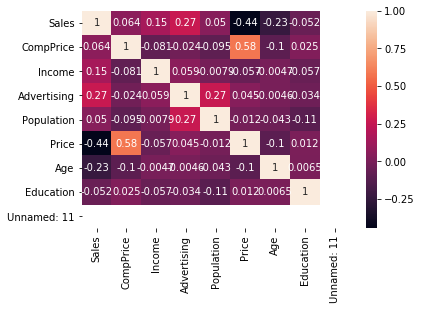

In [3]:
sns.heatmap(car.corr(), annot=True)

In [4]:
car.columns = ['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','unnamed']
data1=car.drop(["unnamed"],axis=1)
data1.columns=['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']

In [5]:
model1 = ols('Sales ~ CompPrice + Income+ Advertising +Population+ Price +C(ShelveLoc)+ Age+ Education+ Urban +US', data=data1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Tue, 04 Dec 2018   Prob (F-statistic):          1.60e-166
Time:                        00:03:04   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

In [76]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    return model

In [77]:
model = forward_selected(data1,'Sales')
print(model.model.formula)
print(model.rsquared_adj)

Sales ~ ShelveLoc + Price + CompPrice + Advertising + Age + Income + US + Education + Urban + 1
0.8700538170630555


In [78]:
ConcreteX = data1[data1.columns.difference(['Sales'])]
print(ConcreteX)

     Advertising  Age  CompPrice  Education  Income  Population  Price  \
0             11   42        138         17      73         276    120   
1             16   65        111         10      48         260     83   
2             10   59        113         12      35         269     80   
3              4   55        117         14     100         466     97   
4              3   38        141         13      64         340    128   
5             13   78        124         16     113         501     72   
6              0   71        115         15     105          45    108   
7             15   67        136         10      81         425    120   
8              0   76        132         10     110         108    124   
9              0   76        132         17     113         131    124   
10             9   26        121         10      78         150    100   
11             4   50        117         13      94         503     94   
12             2   62        122      

In [79]:
X=ConcreteX
y = data1.Sales

In [81]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).